In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
def calculate_serial_parallel_fraction(df):
    N = [32,64,128,256,512,1024]
    for n in N:
        a = df.loc[df[0] == n]
        sum_df = a.groupby([1]).sum()
        sum_df[5] = sum_df[5]/10
        vals = sum_df[4].values
        print(n,round(vals[0],7))

In [66]:
def plot_cores_vs_speed(df):
#     df[4] = df[2] + df[4]
#     df[3] = df[2] + df[3]
    df[5] = df[3]
    N = [32,64,128,256,512,1024]
    plt.figure(figsize=(5,5))
    for n in N:
        a = df.loc[df[0] == n]
        ones = np.zeros((10,1))
        twos = np.zeros((10,1))
        threes = np.zeros((10,1))
        fours = np.zeros((10,1))
        k = 0
        for i in range(10):
            fours[i] = a.iloc[k][5] / a.iloc[k+4][5]
            threes[i] = a.iloc[k][5] / a.iloc[k+3][5]
            twos[i] = a.iloc[k][5] / a.iloc[k+2][5]
            ones[i] = a.iloc[k][5] / a.iloc[k+1][5]
            k = k+5
        cores = [1,2,3,4]
        vals = []
        vals.append(np.sum(ones)/10)
        vals.append(np.sum(twos)/10)
        vals.append(np.sum(threes)/10)
        vals.append(np.sum(fours)/10)
        plt.plot(cores,vals,label=n)
        plt.grid(True)
    plt.xlabel('Number of cores')
    plt.ylabel('Speedup')
    plt.title('Number of cores v/s Speedup for fixed problem size')
    plt.legend()
    plt.show()

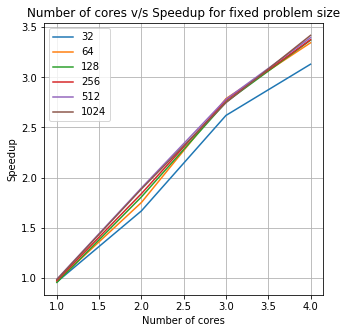

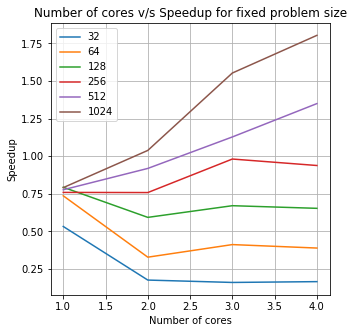

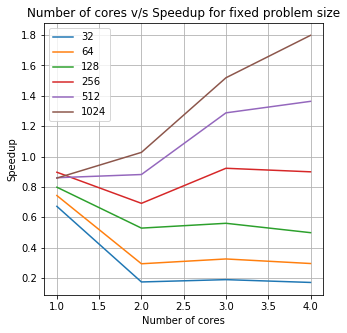

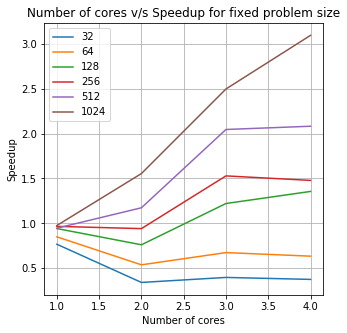

In [67]:
df = pd.read_csv('image_blurring/combined_logs.csv',header=None)
plot_cores_vs_speed(df)
df = pd.read_csv('image_gray_scaling/combined_logs.csv',header=None)
plot_cores_vs_speed(df)
df = pd.read_csv('image_rotation/combined_logs.csv',header=None)
plot_cores_vs_speed(df)
df = pd.read_csv('image_warping/combined_logs.csv',header=None)
plot_cores_vs_speed(df)

In [68]:
df = pd.read_csv('image_blurring/combined_logs.csv',header=None)
df[5] = (df[4] - df[3]) / df[4]
calculate_serial_parallel_fraction(df)
print()
df = pd.read_csv('image_gray_scaling/combined_logs.csv',header=None)
df[5] = (df[4] - df[3]) / df[4]
calculate_serial_parallel_fraction(df)
print()
df = pd.read_csv('image_warping/combined_logs.csv',header=None)
df[5] = (df[4] - df[3]) / df[4]
calculate_serial_parallel_fraction(df)
print()
df = pd.read_csv('image_rotation/combined_logs.csv',header=None)
df[5] = (df[4] - df[3]) / df[4]
calculate_serial_parallel_fraction(df)
print()

32 0.1506703
64 0.6278714
128 2.5265148
256 10.0577404
512 39.6794599
1024 146.4220505

32 0.0019659
64 0.0031849
128 0.0077534
256 0.0261098
512 0.0988868
1024 0.4238204

32 0.0024031
64 0.0048149
128 0.0150396
256 0.0558924
512 0.2531419
1024 1.1371359

32 0.0021359
64 0.0031767
128 0.006838
256 0.0234074
512 0.0847734
1024 0.4166556

